<a href="https://colab.research.google.com/github/YujiOka/LogisticRegression_with_Pytorch/blob/master/73.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import snowballstemmer
import torch

def load_file(filename):
  with open(filename, mode="r", encoding="cp1252") as f:
    lines = f.read().split("\n")
  return lines

In [15]:
features = load_file("/content/drive/My Drive/feature.txt")
print(features[:3])

['passion', 'arous', 'discord']


In [0]:
class Separation(object):
  def __init__(self, feature_path):
    # 素性辞書の読み込み
    self.features = load_file(feature_path)
    self.stemmer = snowballstemmer.stemmer("english")
    self.stop_words = (
    "a,about,above,across,after,again,against,all,allmost,alone,along,already,also,although,always,am,among,amount,an,and,another,any,are,around,"
    "as,at,back,be,because,been,but,before,behind,being,between,beyond,bill,by,can,could,cry,detail,do,does,down,due,during,each,eight,either,eleven,else,empty,"
    "etc,ever,every,except,few,fifteen,fifty,find,fire,first,five,for,forty,four,from,front,full,further,get,give,go,had,has,have,he,her,herself,here,"
    "himself,his,how,however,hundred,if,in,inc,indeed,into,is,it,it's,its,itself,keep,last,latter,least,less,ltd,many,may,me,meanwhile,might,mill,mine,more,"
    "moreover,most,much,must,my,myself,name,neither,never,nevertheress,next,nine,no,nobody,none,noone,nor,not,nothing,now,of,off,often,on,once,one,only,"
    "or,other,others,otherwise,our,ours,ourselves,out,over,own,part,per,perhaps,please,rather,re,same,seem,seemed,seeming,seems,serious,several,she,should"
    "show,side,since,sincere,six,sixty,so,some,somehow,someone,something,sometime,sometimes,somewhere,still,such,system,take,ten,than,that,the,their,them,"
    "themselves,then,there,thereby,therefore,these,they,thick,thin,third,this,those,though,three,through,throughout,thus,to,together,too,top,toward,towaeds,"
    "twelve,twenty,two,under,until,up,upon,us,very,via,was,we,well,were,what,whatever,when,whenever,where,wherever,whether,which,while,who,whoever,who,whoever,"
    "whole,whom,whose,why,will,with,within,would,yet,you,your,yours,yourself,yourselves,the,"
    ).lower().split(",")

  def __len__(self):
    return len(self.features)
  
  def stopword(self, str):
    return str.lower() in self.stop_words
  
  def make_bow_vector(self, sentence):
    vec = torch.zeros(len(self.features))
    sentence = sentence.split(" ")
    for word in sentence:
      # 前後の空白文字除去
      word = word.strip()
      # ストップワード除去
      if self.stopword(word):
        continue
      # ステミング
      word = self.stemmer.stemWord(word)
      if word in self.features:
        vec[self.features.index(word)] += 1
    return vec
  
  def __call__(self, sample):
    if sample[:2] == "+1":
      label = torch.Tensor([0, 1])
    else:
      label = torch.Tensor([1, 0])
    
    return self.make_bow_vector(sample[3:]), label

In [0]:
# word2vecの作成
class MyDataset(torch.utils.data.Dataset):
  def __init__(self, sentiment_path, transform=None):
    self.transform = transform
    # データセットの元文
    self.lines = load_file(sentiment_path)

  def __len__(self):
    return len(self.lines)
    
  def __getitem__(self, index):
    data, label = self.transform(self.lines[index])
    return data, label

In [0]:
class Logistic(torch.nn.Module):
  def __init__(self, vocab_num):
    super(Logistic,self).__init__()
    self.linear = torch.nn.Linear(vocab_num, 2)
    self.sigmoid = torch.nn.Sigmoid()
    
  def forward(self, x):
    x = self.linear(x)
    return self.sigmoid(x)

In [0]:
with open("/content/drive/My Drive/sentiment.txt", mode="r", encoding="cp1252") as f:
  lines = f.read().split("\n")
with open("/content/drive/My Drive/train.txt", mode="w", encoding="cp1252") as f:
  f.write("\n".join(lines[:9000]))
with open("/content/drive/My Drive/test.txt", mode="w", encoding="cp1252") as f:
  f.write("\n".join(lines[9000:]))

epoch: 1 , loss: 381.209747
epoch: 2 , loss: 363.938873
epoch: 3 , loss: 351.313019
epoch: 4 , loss: 340.888519
epoch: 5 , loss: 332.045685
epoch: 6 , loss: 324.518921
epoch: 7 , loss: 317.884735
epoch: 8 , loss: 312.097015
epoch: 9 , loss: 306.917511
epoch: 10 , loss: 302.016571
epoch: 11 , loss: 297.739227
epoch: 12 , loss: 293.609497
epoch: 13 , loss: 290.108643
epoch: 14 , loss: 286.505707
epoch: 15 , loss: 283.192993
epoch: 16 , loss: 280.071198
epoch: 17 , loss: 277.277313
epoch: 18 , loss: 274.688080
epoch: 19 , loss: 271.965668
epoch: 20 , loss: 269.533569
epoch: 21 , loss: 267.188629
epoch: 22 , loss: 264.998901
epoch: 23 , loss: 262.779907
epoch: 24 , loss: 260.811340
epoch: 25 , loss: 258.775574
epoch: 26 , loss: 256.847748
epoch: 27 , loss: 255.130173
epoch: 28 , loss: 253.357910
epoch: 29 , loss: 251.617020
epoch: 30 , loss: 249.991287
epoch: 31 , loss: 248.475128
epoch: 32 , loss: 246.947327
epoch: 33 , loss: 245.510239
epoch: 34 , loss: 244.012253
epoch: 35 , loss: 242.6

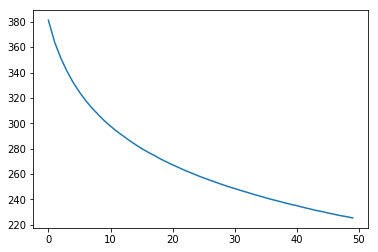

In [41]:
transform = Separation("/content/drive/My Drive/feature.txt")
dataset = MyDataset("/content/drive/My Drive/train.txt",transform=transform)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=16, shuffle=True)
net = Logistic(len(transform)).to("cuda")

loss_fn = torch.nn.BCELoss()
 
optimizer = torch.optim.SGD(net.parameters(), lr=0.1)
 
losses = []
 
for epoch in range(50):
  all_loss = 0
  for batch in dataloader:
    optimizer.zero_grad()
    y_pred = net(batch[0].to("cuda"))

    loss = loss_fn(y_pred, batch[1].to("cuda"))
    all_loss += loss
    loss.backward()

    optimizer.step()
    

  print("epoch: %d , loss: %f" % (epoch+1, all_loss))
  losses.append(all_loss.item())

  if(epoch != 0):
      if(abs(losses[epoch-1] - losses[epoch]) < 0.00001):
          break

%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(losses)
plt.savefig('losses.png')
plt.show()

In [45]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

dataset = MyDataset("/content/drive/My Drive/test.txt",transform=transform)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=len(dataset), shuffle=True)
net = net.to("cpu")

for batch in dataloader:
  with torch.no_grad():
    y_pred = net(batch[0])
    y_pred = torch.argmax(y_pred, dim=1)
    y = batch[1]
    y = torch.argmax(y, dim=1)
    
y_pred = y_pred.numpy()
y = y.numpy()

print('accuracy = ', accuracy_score(y_true=y, y_pred=y_pred))
print('f1 score = ', f1_score(y_true=y, y_pred=y_pred))    

accuracy =  0.745640408899579
f1 score =  0.7483640690065438


In [0]:
torch.cuda.is_available()

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

dataloader = torch.utils.data.DataLoader(dataset, batch_size=len(dataset), shuffle=False)

for batch in dataloader:
  text = batch[0].numpy()
  label = batch[1].numpy()

label = [l.tolist().index(1) for l in label]

X_train = text[:9000]
X_test = text[9000:]
Y_train = label[:9000]
Y_test = label[9000:]
lr = LogisticRegression()
lr.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
Y_pred = lr.predict(X_test)

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

print('accuracy = ', accuracy_score(y_true=Y_test, y_pred=Y_pred))
print('f1 score = ', f1_score(y_true=Y_test, y_pred=Y_pred))

accuracy =  0.7570655441972339
f1 score =  0.7563329312424608
